<div>
    <h3 align="center"> In the name of GOD </h3>
    <h1 align="center"> Association Rules </h1> 
    <h2 align="center"> (apriori and fp-growth algorithms) </h2> 
    <h3 align="center"> Data Mining Course - Trem: 992 </h3>
    <h4 align="center"> 1400/2/21 </h4>
    <h5 align="center"> Esmaeil Bagheri (@bagheri471) </h5>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import association_rules  # mlxtend: Machine Learning Extend
from mlxtend.preprocessing import TransactionEncoder
# import apriori and fp-growth algorithms packages
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [3]:
students5=pd.read_excel('data/StudentSampleDataset-100.xls')   #_csv('data/StudentSampleDataset.csv')
students5.head()
# ....

,Unnamed: 0,EntryTerm,HomeAddress,HomeStreet,Age,Gender,MaritalStatus,Course,Level,Status,PreviousAverage,Average
0,0,981,Dehaghan,4,37,0,1,computer,Arshad,Dar Hale Tahsil,14.18,15.36
1,1,991,Shahreza,5,26,0,1,hesabdari,Arshad,Dar Hale Tahsil,16.17,15.99
2,2,971,Semirom,4,27,1,0,hesabdari,Kardani,Adame Morajeh,18.05,14.39
3,3,971,Shahreza,8,39,0,0,hesabdari,Karshenasi Peyvasteh,Dar Hale Tahsil,12.90,19.05
4,4,982,Shahreza,7,22,1,1,computer,Karshenasi Napeyvasteh,Dar Hale Tahsil,14.32,12.80


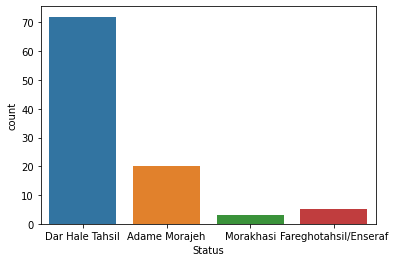

array(['computer', 'hesabdari', 'mekanic', 'modiriat'], dtype=object)

In [4]:
students=pd.read_excel('data/StudentSampleDataset-100.xls')   #_csv('data/StudentSampleDataset.csv')
# print(students.head())
# print(students.shape)
# print(students.info())
# print(students.columns)

# sns.countplot(x=students['HomeAddress'],data=students['HomeAddress'])  
# sns.countplot(x=students['EntryTerm'],data=students['EntryTerm'])  
# sns.countplot(x=students['Course'],data=students['Course']) 
sns.countplot(x=students['Status'],data=students['Status']) 
plt.show()

students.groupby('HomeAddress').size()
students['EntryTerm'].unique()
students['Course'].unique()

In [8]:
dir(train_test_split)
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

<AxesSubplot:xlabel='HomeAddress', ylabel='Course'>

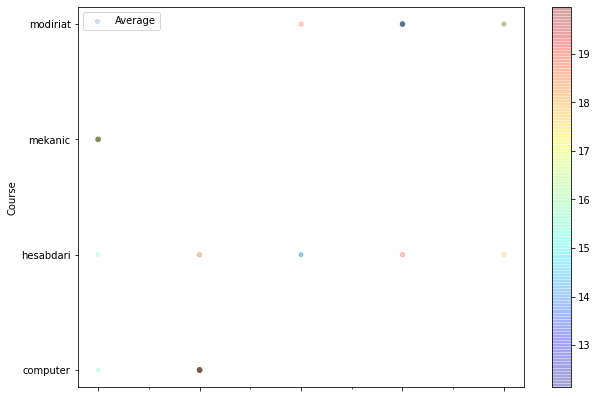

In [4]:
students.plot(kind="scatter", x="HomeAddress", y="Course",
          s=students['Average'], label="Average",    #s is size of points || shoae dayere
          c=students['Average'], cmap=plt.get_cmap("jet"), #c is color
          figsize=(10,7), alpha=0.2)  #alpha is opacity

In [5]:
students[["HomeAddress","Course","Level","Status"]]

,HomeAddress,Course,Level,Status
0,Dehaghan,computer,Arshad,Dar Hale Tahsil
1,Shahreza,hesabdari,Arshad,Dar Hale Tahsil
2,Semirom,hesabdari,Kardani,Adame Morajeh
3,Shahreza,hesabdari,Karshenasi Peyvasteh,Dar Hale Tahsil
4,Shahreza,computer,Karshenasi Napeyvasteh,Dar Hale Tahsil
...,...,...,...,...
95,Dehaghan,mekanic,Kardani,Dar Hale Tahsil
96,Boroojen,hesabdari,Karshenasi Napeyvasteh,Dar Hale Tahsil
97,Shahreza,computer,Karshenasi Peyvasteh,Adame Morajeh
98,Shahreza,computer,Arshad,Adame Morajeh


In [21]:
# LabelEncoder for Categorical & Text Data 
# convert text to 1 , 2 , 3 , 4 , ... (some categories)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

HomeAddress=students["HomeAddress"]#,"Course","Level","Status"]]
HomeAddressEncoded=encoder.fit_transform(HomeAddress)
HomeAddressEncoded=pd.DataFrame(HomeAddressEncoded,columns=["HomeAddress"])

Course=students["Course"]
CourseEncoded=encoder.fit_transform(Course)
CourseEncoded=pd.DataFrame(CourseEncoded,columns=["Course"])

Level=students["Level"]
LevelEncoded=encoder.fit_transform(Level)
LevelEncoded=pd.DataFrame(LevelEncoded,columns=["Level"])

Status=students["Status"]
StatusEncoded=encoder.fit_transform(Status)
StatusEncoded=pd.DataFrame(StatusEncoded,columns=["Status"])
print(StatusEncoded.head())
print(Status)
# irade LabelEncoder: algorithmhaye Machine Learning rabeteye beyne adaad ra dar nazar migirand va fekr mikonand 0 ha ba 1 ha rabete nazdiktar darand va ba 3 fasele darand! ke dar in mesal intor nist.
# bayad dar in mavared az "OneHotEncoder" estefade konim, dar tasvire zamime tozihat ra bebinid.
# agar grooha masalan "kam", "motavaset", "ziad", ... bood az LabelEncoder estefade mikonim
EncodedDataMap=pd.concat([students[['HomeAddress']],HomeAddressEncoded,students[['Course']],CourseEncoded,students[['Level']],LevelEncoded,students[['Status']],StatusEncoded],axis=1) # axis=1: yani sotoni anjam bede. yani sotoonha ra kenare ham gharar bede.
final=pd.concat([students[['EntryTerm','Age','Gender','MaritalStatus','PreviousAverage', 'Average']],HomeAddressEncoded,CourseEncoded,LevelEncoded,StatusEncoded],axis=1) # axis=1: yani sotoni anjam bede. yani sotoonha ra kenare ham gharar bede.
final.head(10)
# final.info()
# EncodedDataMap.nunique().tolist()

# col1: A  B  C ---> 1  2   3
#  A  1   1  0  0
#  B  2   0  1  0
#  C  3   0  0  1


   Status
0       1
1       1
2       0
3       1
4       1
0     Dar Hale Tahsil
1     Dar Hale Tahsil
2       Adame Morajeh
3     Dar Hale Tahsil
4     Dar Hale Tahsil
           ...       
95    Dar Hale Tahsil
96    Dar Hale Tahsil
97      Adame Morajeh
98      Adame Morajeh
99    Dar Hale Tahsil
Name: Status, Length: 100, dtype: object


,EntryTerm,Age,Gender,MaritalStatus,PreviousAverage,Average,HomeAddress,Course,Level,Status
0,981,37,0,1,14.18,15.36,1,0,0,1
1,991,26,0,1,16.17,15.99,4,1,0,1
2,971,27,1,0,18.05,14.39,3,1,1,0
3,971,39,0,0,12.90,19.05,4,1,3,1
4,982,22,1,1,14.32,12.80,4,0,2,1
5,991,18,1,1,12.41,16.43,1,2,3,3
6,971,38,1,1,17.57,16.39,4,0,2,0
7,982,23,0,0,13.60,16.59,1,2,1,1
8,972,24,0,0,13.54,17.47,4,0,2,3
9,971,33,0,1,13.14,16.27,3,1,1,0


In [7]:
# standard correlation coefficient [-1,1] / zaribe hambastegie khati va rabeteh beyne data
corr_matrix = final.corr()
corr_matrix["HomeAddress"].sort_values(ascending=False)
# 'EntryTerm', 'HomeAddress', 'HomeStreet', 
# 'Age','Gender', 'MaritalStatus', 'Course', 
# 'Level', 'Status','PreviousAverage', 'Average'

HomeAddress        1.000000
Level              0.268748
Gender             0.128193
MaritalStatus      0.113949
Average            0.046642
PreviousAverage    0.030258
EntryTerm          0.001836
Age               -0.066936
Status            -0.153664
Course            -0.817604
Name: HomeAddress, dtype: float64

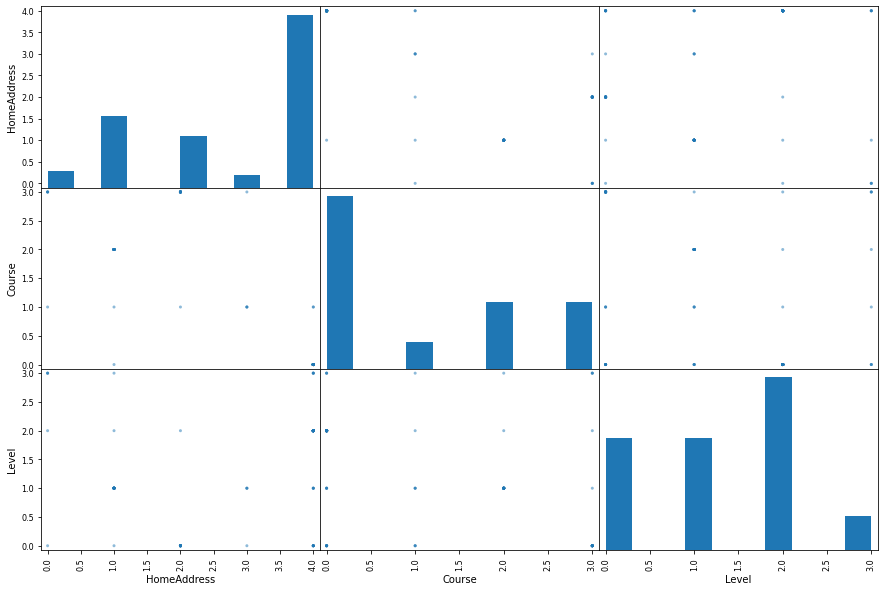

In [8]:
#Chon 'standard correlation coefficient' hameye vabastegiha va rabeteha ra neshan nemidahad
# az scatter_matrix estefade va vijegihaei ke fekr mikonim ba ham rabete dashte bashand ra ba aan rasm mikonim
features = ["HomeAddress","Course","Level"]
scatter_matrix(final[features], figsize=(15,10))
plt.show()  #baraye hazfe array dar khorooji

<AxesSubplot:xlabel='HomeAddress', ylabel='Course'>

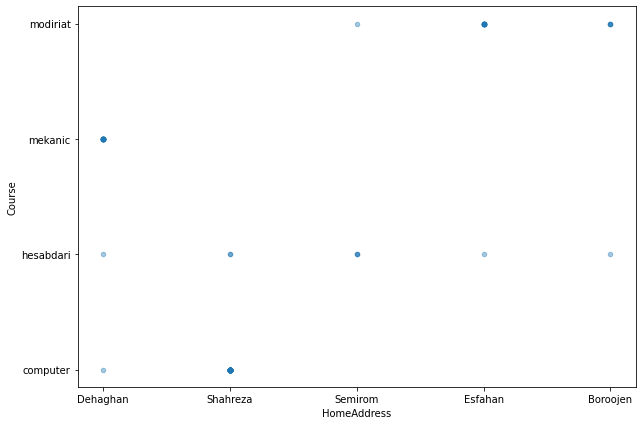

In [9]:
#ba deghate bishtari vabastegie "HomeAddress" , "Course" ra baresi mikonim
students.plot(kind="scatter", x="HomeAddress", y="Course", figsize=(10,7), alpha=0.4)

In [10]:
students1=students[['HomeAddress','Course','Level','Status']].values.tolist()  # baraye tabdil DataFrame be List. listi az listha!
students1

[['Dehaghan', 'computer', 'Arshad', 'Dar Hale Tahsil'],
 ['Shahreza', 'hesabdari', 'Arshad', 'Dar Hale Tahsil'],
 ['Semirom', 'hesabdari', 'Kardani', 'Adame Morajeh'],
 ['Shahreza', 'hesabdari', 'Karshenasi Peyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Dehaghan', 'mekanic', 'Karshenasi Peyvasteh', 'Morakhasi'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Adame Morajeh'],
 ['Dehaghan', 'mekanic', 'Kardani', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Morakhasi'],
 ['Semirom', 'hesabdari', 'Kardani', 'Adame Morajeh'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Dehaghan', 'mekanic', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'compu

In [11]:
students2 = [[ele for ele in sub if type(ele) != float] for sub in students1]   # '== str' is Ok
students2

[['Dehaghan', 'computer', 'Arshad', 'Dar Hale Tahsil'],
 ['Shahreza', 'hesabdari', 'Arshad', 'Dar Hale Tahsil'],
 ['Semirom', 'hesabdari', 'Kardani', 'Adame Morajeh'],
 ['Shahreza', 'hesabdari', 'Karshenasi Peyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Dehaghan', 'mekanic', 'Karshenasi Peyvasteh', 'Morakhasi'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Adame Morajeh'],
 ['Dehaghan', 'mekanic', 'Kardani', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Morakhasi'],
 ['Semirom', 'hesabdari', 'Kardani', 'Adame Morajeh'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Dehaghan', 'mekanic', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'computer', 'Karshenasi Napeyvasteh', 'Dar Hale Tahsil'],
 ['Shahreza', 'compu

In [12]:
te = TransactionEncoder()  # baraye tabdile 'str' be adadi. chon ML algorithm faghat ba adaad kar mikonad.
#te_ary = te.fit(groc).transform(groc)
te_ary=te.fit_transform(students2)
te_ary

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False,  True]])

In [13]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Adame Morajeh,Arshad,Boroojen,Dar Hale Tahsil,Dehaghan,Esfahan,Fareghotahsil/Enseraf,Kardani,Karshenasi Napeyvasteh,Karshenasi Peyvasteh,Morakhasi,Semirom,Shahreza,computer,hesabdari,mekanic,modiriat
0,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False
4,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
96,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False
97,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
98,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [14]:
# frequent itemsets by apriori & fpgrowth
frequent_itemsets_apriori = apriori(df, min_support=0.02, use_colnames=True)  # min_support=0.03 , min_support=0.1 , use_colnames=False
frequent_itemsets_apriori
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.05, use_colnames=True)
#frequent_itemsets_fpgrowth
# natije apriori ba fpgrowth dar in mesal farghi nemikonad.

In [15]:
frequent_itemsets_apriori.sort_values(by=['support'],ascending=False)

,support,itemsets
3,0.72,(Dar Hale Tahsil)
12,0.53,(Shahreza)
13,0.52,(computer)
68,0.51,"(Shahreza, computer)"
8,0.40,(Karshenasi Napeyvasteh)
...,...,...
49,0.02,"(Dehaghan, Morakhasi)"
97,0.02,"(Kardani, computer, Dar Hale Tahsil)"
102,0.02,"(computer, Karshenasi Peyvasteh, Dar Hale Tahsil)"
27,0.02,"(mekanic, Adame Morajeh)"


In [16]:
frequent_itemsets_fpgrowth.sort_values(by=['support'],ascending=False)

,support,itemsets
0,0.72,(Dar Hale Tahsil)
4,0.53,(Shahreza)
1,0.52,(computer)
16,0.51,"(Shahreza, computer)"
9,0.40,(Karshenasi Napeyvasteh)
...,...,...
29,0.06,"(hesabdari, Dar Hale Tahsil)"
23,0.06,"(computer, Arshad, Shahreza, Dar Hale Tahsil)"
14,0.05,(Boroojen)
13,0.05,(Fareghotahsil/Enseraf)


In [17]:
# association rules
rules=association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.1) 
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(computer),(Dar Hale Tahsil),0.52,0.72,0.38,0.730769,1.014957,0.0056,1.040000
1,(Dar Hale Tahsil),(computer),0.72,0.52,0.38,0.527778,1.014957,0.0056,1.016471
2,(Shahreza),(computer),0.53,0.52,0.51,0.962264,1.850508,0.2344,12.720000
3,(computer),(Shahreza),0.52,0.53,0.51,0.980769,1.850508,0.2344,24.440000
4,"(Shahreza, computer)",(Dar Hale Tahsil),0.51,0.72,0.37,0.725490,1.007625,0.0028,1.020000
...,...,...,...,...,...,...,...,...,...
221,"(Dar Hale Tahsil, modiriat)",(Arshad),0.13,0.26,0.11,0.846154,3.254438,0.0762,4.810000
222,"(Arshad, modiriat)",(Dar Hale Tahsil),0.15,0.72,0.11,0.733333,1.018519,0.0020,1.050000
223,(Dar Hale Tahsil),"(Arshad, modiriat)",0.72,0.15,0.11,0.152778,1.018519,0.0020,1.003279
224,(Arshad),"(Dar Hale Tahsil, modiriat)",0.26,0.13,0.11,0.423077,3.254438,0.0762,1.508000


In [18]:
rules=association_rules(frequent_itemsets_apriori, metric="conviction", min_threshold=0.1)  # metric="confidence"
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Arshad),(Adame Morajeh),0.26,0.20,0.04,0.153846,0.769231,-0.0120,0.945455
1,(Adame Morajeh),(Arshad),0.20,0.26,0.04,0.200000,0.769231,-0.0120,0.925000
2,(Dehaghan),(Adame Morajeh),0.22,0.20,0.02,0.090909,0.454545,-0.0240,0.880000
3,(Adame Morajeh),(Dehaghan),0.20,0.22,0.02,0.100000,0.454545,-0.0240,0.866667
4,(Esfahan),(Adame Morajeh),0.16,0.20,0.03,0.187500,0.937500,-0.0020,0.984615
...,...,...,...,...,...,...,...,...,...
533,"(Shahreza, computer)","(Karshenasi Napeyvasteh, Fareghotahsil/Enseraf)",0.51,0.02,0.02,0.039216,1.960784,0.0098,1.020000
534,(Fareghotahsil/Enseraf),"(Karshenasi Napeyvasteh, Shahreza, computer)",0.05,0.37,0.02,0.400000,1.081081,0.0015,1.050000
535,(Karshenasi Napeyvasteh),"(Fareghotahsil/Enseraf, Shahreza, computer)",0.40,0.02,0.02,0.050000,2.500000,0.0120,1.031579
536,(Shahreza),"(Karshenasi Napeyvasteh, Fareghotahsil/Enseraf...",0.53,0.02,0.02,0.037736,1.886792,0.0094,1.018431


In [19]:
rules.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
353,"(computer, Kardani)",(Shahreza),0.04,0.53,0.04,1.000000,1.886792,0.0188,inf
386,"(mekanic, Kardani, Adame Morajeh)",(Dehaghan),0.02,0.22,0.02,1.000000,4.545455,0.0156,inf
107,"(Esfahan, Adame Morajeh)",(Arshad),0.03,0.26,0.03,1.000000,3.846154,0.0222,inf
167,"(Karshenasi Napeyvasteh, Adame Morajeh)",(Shahreza),0.07,0.53,0.07,1.000000,1.886792,0.0329,inf
470,"(mekanic, Dar Hale Tahsil, Kardani)",(Dehaghan),0.14,0.22,0.14,1.000000,4.545455,0.1092,inf
...,...,...,...,...,...,...,...,...,...
267,(Dar Hale Tahsil),"(Shahreza, Kardani)",0.72,0.04,0.02,0.027778,0.694444,-0.0088,0.987429
495,(Dar Hale Tahsil),"(computer, Shahreza, Kardani)",0.72,0.04,0.02,0.027778,0.694444,-0.0088,0.987429
273,(Dar Hale Tahsil),"(computer, Kardani)",0.72,0.04,0.02,0.027778,0.694444,-0.0088,0.987429
303,(Dar Hale Tahsil),"(Karshenasi Peyvasteh, computer)",0.72,0.03,0.02,0.027778,0.925926,-0.0016,0.997714


In [20]:
rules.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
404,"(hesabdari, Adame Morajeh)","(Semirom, Kardani)",0.02,0.03,0.02,1.000000,33.333333,0.0194,inf
405,"(Semirom, Kardani)","(hesabdari, Adame Morajeh)",0.03,0.02,0.02,0.666667,33.333333,0.0194,2.940000
409,(Semirom),"(hesabdari, Kardani, Adame Morajeh)",0.04,0.02,0.02,0.500000,25.000000,0.0192,1.960000
182,(Semirom),"(hesabdari, Adame Morajeh)",0.04,0.02,0.02,0.500000,25.000000,0.0192,1.960000
400,"(hesabdari, Kardani, Adame Morajeh)",(Semirom),0.02,0.04,0.02,1.000000,25.000000,0.0192,inf
...,...,...,...,...,...,...,...,...,...
492,(Kardani),"(Dar Hale Tahsil, Shahreza, computer)",0.26,0.37,0.02,0.076923,0.207900,-0.0762,0.682500
270,"(Dar Hale Tahsil, computer)",(Kardani),0.38,0.26,0.02,0.052632,0.202429,-0.0788,0.781111
271,(Kardani),"(Dar Hale Tahsil, computer)",0.26,0.38,0.02,0.076923,0.202429,-0.0788,0.671667
265,(Kardani),"(Shahreza, Dar Hale Tahsil)",0.26,0.39,0.02,0.076923,0.197239,-0.0814,0.660833


In [21]:
rules.sort_values(by=['leverage'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(Shahreza),(computer),0.53,0.52,0.51,0.962264,1.850508,0.2344,12.720000
103,(computer),(Shahreza),0.52,0.53,0.51,0.980769,1.850508,0.2344,24.440000
358,"(Karshenasi Napeyvasteh, Shahreza)",(computer),0.37,0.52,0.37,1.000000,1.923077,0.1776,inf
363,(computer),"(Karshenasi Napeyvasteh, Shahreza)",0.52,0.37,0.37,0.711538,1.923077,0.1776,2.184000
362,(Shahreza),"(Karshenasi Napeyvasteh, computer)",0.53,0.37,0.37,0.698113,1.886792,0.1739,2.086875
...,...,...,...,...,...,...,...,...,...
355,(Kardani),"(Shahreza, computer)",0.26,0.51,0.04,0.153846,0.301659,-0.0926,0.579091
82,(Kardani),(computer),0.26,0.52,0.04,0.153846,0.295858,-0.0952,0.567273
83,(computer),(Kardani),0.52,0.26,0.04,0.076923,0.295858,-0.0952,0.801667
80,(Shahreza),(Kardani),0.53,0.26,0.04,0.075472,0.290276,-0.0978,0.800408
